In [1]:
from stochastic import stochastic_model
import pandas as pd

# Colecting data

In [2]:
stock_list = ['AMD', 'TSLA', 'AAPL', 'F', 'AAL', 'NVDA', 'PFE', 'INTC', 'KEY',
       'BAC', 'CCL', 'AMZN', 'T', 'KMI', 'PYPL', 'BA', 'UBER', 'MSFT',
       'XOM', 'HBAN', 'GOOG', 'BMY', 'META', 'TFC', 'WFC', 'GM', 'CSX',
       'CVS', 'VZ', 'PCG', 'MMM']

In [3]:
test_list = []
errors = []
stop_loss_list = [3,7,14,21,30]

for stock in stock_list:
    for stop_loss in stop_loss_list:

        try:
            test = stochastic_model(stock, stop_loss)

            results = {'Stock' : stock, 'Stop loss' : stop_loss, 'Buy n hold' : test[0], 'Long position return' : test[1], 
                       'Short position return' : test[2], 'Average return' : test[3]}

            test_list.append(results)

        except:
            errors.append({stock:stop_loss})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Making main_df and error_df 

In [4]:
test_df = pd.DataFrame(test_list)

In [5]:
test_df.sample(5)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
104,GOOG,30,5339.852380,280.372907,-98.864720,90.754094
36,INTC,7,151.319972,84.275908,110.290303,97.283106
66,KMI,7,3.225203,-90.552155,1.986522,-44.282817
58,AMZN,21,7482.955995,8960.845592,-99.881091,4430.482250
3,AMD,21,1041.861971,-75.717367,-82.140121,-78.928744


In [6]:
errors_keys = []
errors_values = []

for error in errors:
    errors_keys.append(list(error.keys())[0])
    errors_values.append(list(error.values())[0])

In [7]:
error_df = pd.DataFrame()
error_df['Stocks'] = errors_keys
error_df['Stop loss'] = errors_values

error_df.head()

,Stocks,Stop loss


# Analysis

In [8]:
per_error = len(error_df) / (len(error_df) + len(test_df))

print(f'Error fee: {round(per_error*100,2)}%')

Error fee: 0.0%


In [9]:
test_df.head()

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
0,AMD,3,1041.861971,-56.085813,-61.497053,-58.791433
1,AMD,7,1041.861971,73.283128,-88.663569,-7.690221
2,AMD,14,1041.861971,65.194501,-88.123019,-11.464259
3,AMD,21,1041.861971,-75.717367,-82.140121,-78.928744
4,AMD,30,1041.861971,-94.034672,-92.640128,-93.337400


In [10]:
# Long position vs Buy and hold
test_df['LP vs BH (%)'] = ((test_df['Long position return'] / test_df['Buy n hold']) - 1) * 100

# Short position vs Buy and hold
test_df['SP vs BH (%)'] = ((test_df['Short position return'] / test_df['Buy n hold']) - 1) * 100

# Average return vs Buy and hold
test_df['Avg vs BH (%)'] = ((test_df['Average return'] / test_df['Buy n hold']) - 1) * 100

In [11]:
round(test_df.sample(10),2)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
90,XOM,3,365.67,31.22,-17.30,6.96,-91.46,-104.73,-98.10
116,TFC,7,104.60,50.95,-69.85,-9.45,-51.29,-166.78,-109.04
27,NVDA,14,37105.34,1302.47,-100.00,601.24,-96.49,-100.27,-98.38
89,MSFT,30,2346.33,3150.27,-96.41,1526.93,34.26,-104.11,-34.92
115,TFC,3,104.60,-60.09,-76.89,-68.49,-157.45,-173.51,-165.48
75,BA,3,600.47,-11.28,-41.97,-26.63,-101.88,-106.99,-104.43
138,CVS,21,463.39,666.95,-96.17,285.39,43.93,-120.75,-38.41
35,INTC,3,151.32,93.86,75.53,84.70,-37.97,-50.08,-44.03
105,BMY,3,265.93,11.14,-29.94,-9.40,-95.81,-111.26,-103.53
65,KMI,3,3.23,-35.43,-1.02,-18.23,-1198.66,-131.55,-665.11


In [12]:
return_df = test_df.groupby('Stop loss')[['Buy n hold', 'Long position return', 'Short position return', 'Average return']].mean()
round(return_df, 2)

,Buy n hold,Long position return,Short position return,Average return
Stop loss,,,,
3,4072.43,65.03,-37.67,13.68
7,4072.43,153.57,-35.38,59.09
14,4072.43,1110.20,-12.17,549.02
21,4072.43,3947.62,115.35,2031.49
30,4072.43,9903.63,173.83,5038.73


In [13]:
compare_df = test_df.groupby('Stop loss')[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].mean()
compare_df

,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
Stop loss,,,
3,-1537.770992,4.422584,-766.674204
7,-2232.327456,81.992066,-1075.167695
14,443.434920,81.775963,262.605442
21,7791.392078,514.508109,4152.950094
30,21961.832560,613.622980,11287.727770


<Axes: xlabel='Stop loss'>

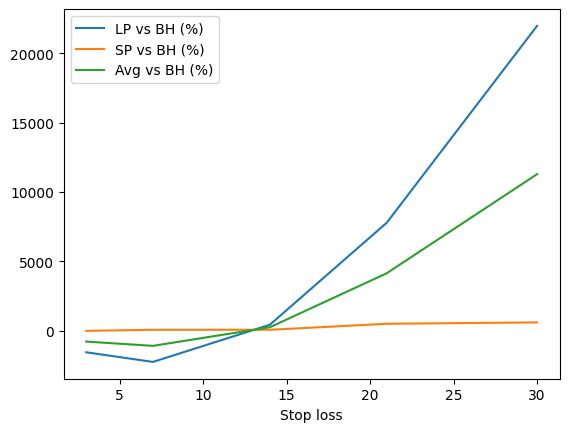

In [14]:
compare_df[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].plot()

In [15]:
test_df.to_excel('../../return_data/stochastic.xlsx')